In [1]:
#pip install geopy
import plotly.express as px
import pandas as pd
from pathlib import Path
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
project_path = Path().resolve().parent
csv_path = project_path /"data"

Topic by LDA

In [23]:
# Open in pandas the table with the topic LDA
df_lda = pd.read_csv(csv_path / "topic_lda.csv") #Make sure to update this data
df_lda.head()
df_nmf = pd.read_table(csv_path / "topic_classification.txt",sep=',') #Make sure to update this data
df_nmf.head()

,title,main_topic_1_index,main_topic_1_weigth,main_topic_2_index,main_topic_2_weigth,main_topic_3_index,main_topic_3_weigth,main_topic_4_index,main_topic_4_weigth,main_topic_5_index,...,main_topic_21_index,main_topic_21_weigth,main_topic_22_index,main_topic_22_weigth,main_topic_23_index,main_topic_23_weigth,main_topic_24_index,main_topic_24_weigth,main_topic_25_index,main_topic_25_weigth
0,CGI_2013,4,0.413642,1,0.032632113517595006,10,0.002403376684091891,19,0.002039285396823799,5,...,none,none,none,none,none,none,none,none,none,none
1,Prayer_Breakfast_2016,20,0.254319,21,0.13874539443627698,0,0.017418105723654678,19,0.011856259805532956,11,...,none,none,none,none,none,none,none,none,none,none
2,Security_Team_Announcement,9,0.147426,8,0.09588333619120101,7,0.04684129255216229,10,0.03915738124534947,22,...,none,none,none,none,none,none,none,none,none,none
3,Cairo_University,21,0.419471,11,0.13660177640347296,7,0.049827558347054775,8,0.03659511830870309,2,...,none,none,none,none,none,none,none,none,none,none
4,Umpqua_Community_College_Shootings,6,0.299799,9,0.028849921936287493,20,0.0227824245586038,10,0.008612726270147837,19,...,none,none,none,none,none,none,none,none,none,none


In [75]:
filepath_2 = Path.cwd().parent / "data" / "Approval_Index.xlsx"
approval=pd.read_excel(filepath_2, usecols=['DATE','APPROVAL INDEX'])
approval.head()
approval=approval.rename(columns={'DATE':'date','APPROVAL INDEX':'approval_index'})
approval.head()
df_lda['date'] = df_lda['date'].astype('datetime64[ns]')
df_lda['year']=df_lda['date'].dt.year
df_lda["topic_1_num"] = df_lda["main_topic_1"].str.replace("Topic ", "")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\aleja\\Documents\\KU Leuven\\Second semester\\Modern Data Analytics\\mda-kuwait\\components\\data\\Approval_Index.xlsx'

In [13]:
merged_lda=pd.merge(df_lda,approval,on='date',how='left')

In [14]:
import datetime
merged_lda.loc[merged_lda.approval_index.isna(),'date']= merged_lda.date+pd.Timedelta("2 days")
merged_lda=pd.merge(merged_lda.drop(['approval_index'],axis=1),approval,on='date',how='left')
merged_lda.head()


,title,pages,date,location,highest_speaker_count,content,country,count_commas,state,city,...,main_topic_7_perc,main_topic_8,main_topic_8_perc,main_topic_9,main_topic_9_perc,main_topic_10,main_topic_10_perc,year,topic_1_num,approval_index
0,CGI_2013,19,2013-09-24,"Sheraton New York Hotel and Towers, New York, ...",10,Hillary Clinton: Thank you very much. I have t...,USA,2,New York,New York,...,0.004650,Topic 8,0.004650,Topic 3,0.004650,Topic 9,0.004650,2013,7,-12.0
1,Prayer_Breakfast_2016,7,2016-02-04,"Washington Hilton, Washington D.C.",0,"Well, good morning. Giving all praise and hono...",USA,1,no_state,Washington D.C.,...,0.013213,Topic 3,0.013213,Topic 10,0.013213,Topic 7,0.013213,2016,1,-14.0
2,Security_Team_Announcement,5,2008-12-01,"Chicago, Illinois",0,"Good morning, everybody. I hope you all had a ...",USA,1,Illinois,Chicago,...,0.015630,Topic 1,0.015629,Topic 4,0.015629,Topic 7,0.015629,2008,8,24.0
3,Cairo_University,14,2009-06-04,"Cairo, Egypt",0,Thank you so much. Good afternoon. I am honore...,Egypt,1,no_state,Cairo,...,0.005579,Topic 6,0.005579,Topic 7,0.005579,Topic 4,0.005579,2009,1,2.0
4,Umpqua_Community_College_Shootings,4,2015-10-01,Washington D.C.,0,There's been another mass shooting in America ...,USA,0,no_state,Washington D.C.,...,0.027939,Topic 6,0.027939,Topic 10,0.027938,Topic 9,0.027937,2015,4,-16.0


In [15]:
merged_lda.loc[merged_lda.approval_index.isna(),['date','state','country','approval_index']]
merged_lda['approval_index'].astype('Int64')



0      -12
1      -14
2       24
3        2
4      -16
      ... 
431    -23
432    -15
433     -8
434    -20
435    -10
Name: approval_index, Length: 436, dtype: Int64

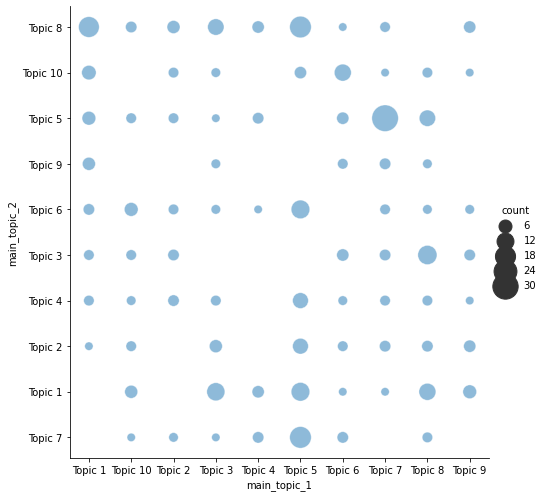

In [17]:
cross_topic_lda=pd.DataFrame(merged_lda.groupby(['main_topic_1']).main_topic_2.value_counts().reset_index(name='count'))
sns.relplot(x="main_topic_1", y="main_topic_2", size="count",sizes=(70, 700), alpha=.5,height=7, data=cross_topic_lda)

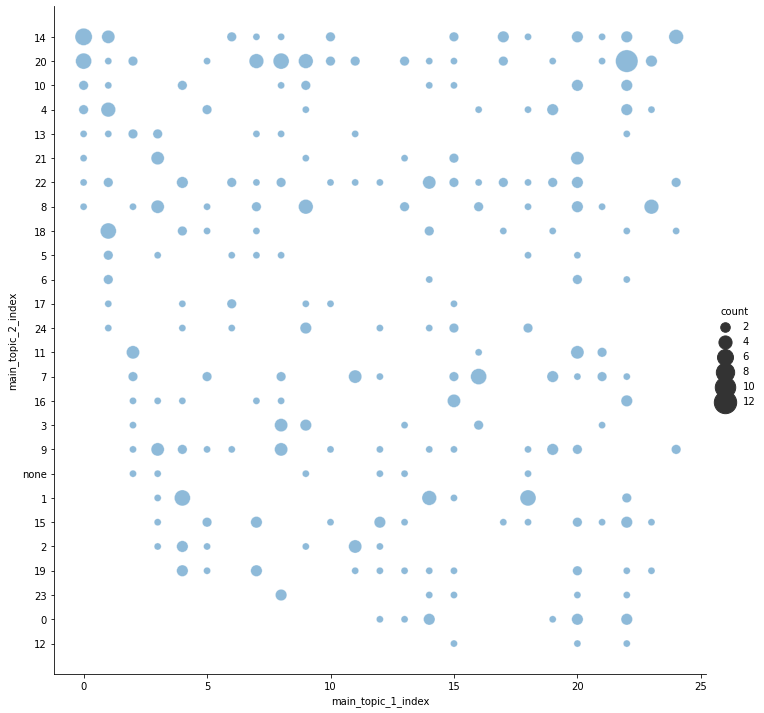

In [73]:
most_freq_topic=[22,20,8,1,4,9,15,14,0,3]##.loc[df_nmf['main_topic_1_index']].isin(most_freq_topic)
cross_topic_nmf=pd.DataFrame(df_nmf.groupby(['main_topic_1_index']).main_topic_2_index.value_counts().reset_index(name='count'))
order_2 = ['1','2','3','4','5','6','7','8','9','10','11','12','13', '14','15','16','17','18','19','20', '21','22','23','24','25','none']
sns.relplot(x="main_topic_1_index", y="main_topic_2_index", size="count",sizes=(50, 500), alpha=.5,height=10, data=cross_topic_nmf,row_order=order_2)

<AxesSubplot:xlabel='year'>

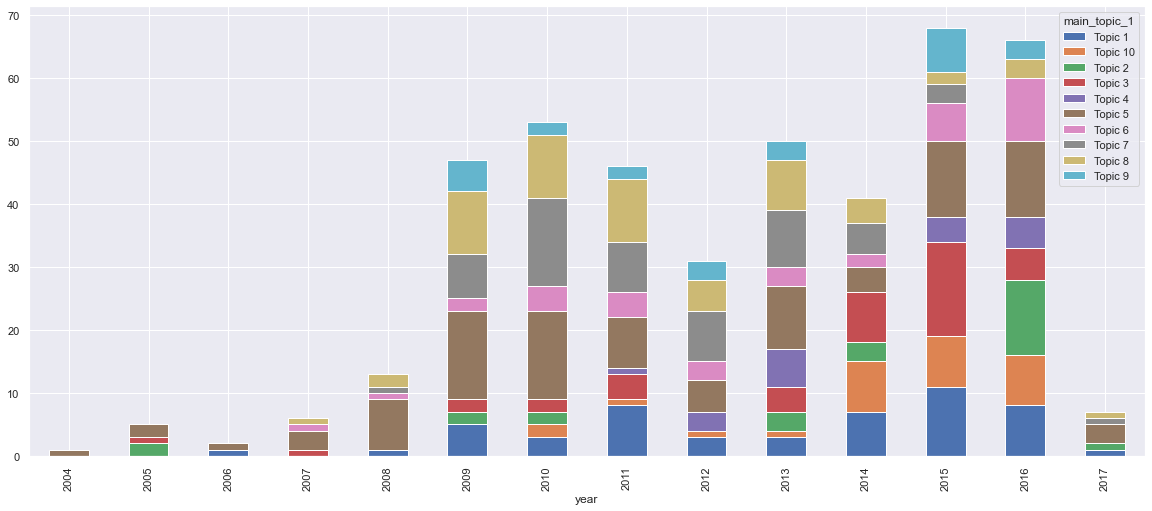

In [88]:
n_approval = pd.crosstab(index=merged_lda['main_topic_1'], columns=merged_lda['year']) 
n_approval
sns.set(rc={'figure.figsize':(20,8.27)})
n_approval.T.plot.bar(stacked=True)

<AxesSubplot:xlabel='year'>

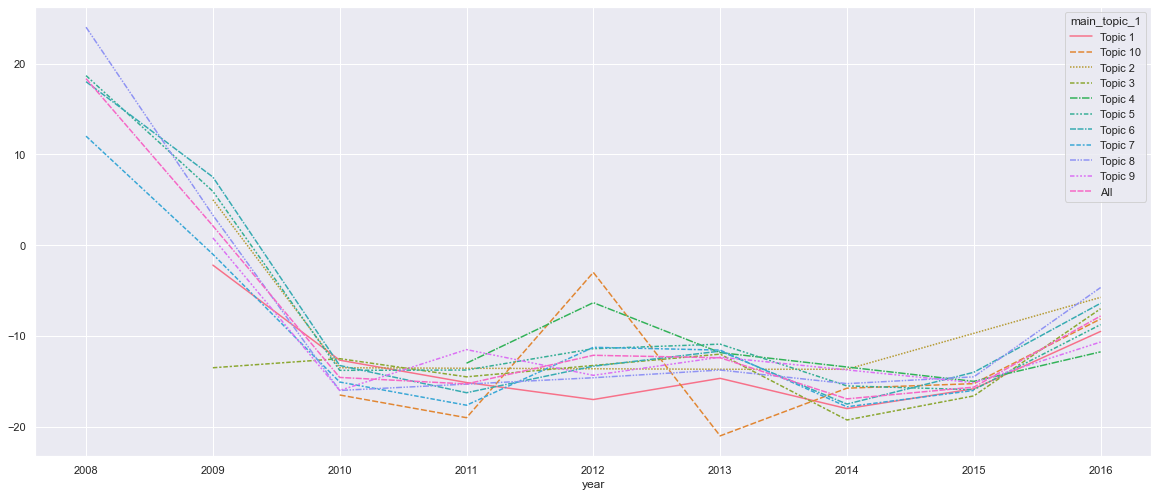

In [175]:
avg_approval = pd.pivot_table(merged_lda, values='approval_index', columns='year',index=['main_topic_1'],aggfunc=np.mean,margins=True)
avg_approval=avg_approval.iloc[: , :-2].transpose()
sns.set(rc={'figure.figsize':(20,8.27)})
sns.lineplot(data=avg_approval)

In [29]:
state_approval = pd.pivot_table(merged_lda.loc[merged_lda['country']=='USA'], values='approval_index', columns='main_topic_1',index=['state'],aggfunc=np.mean,margins=True)
state_approval


main_topic_1,Topic 1,Topic 10,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,All
state,,,,,,,,,,,
Alabama,-15.000000,NaN,NaN,NaN,NaN,NaN,-15.000000,NaN,NaN,NaN,-15.000000
Arizona,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,-13.000000,NaN,-2.500000
California,NaN,NaN,-13.000000,NaN,NaN,NaN,-16.000000,-8.000000,-22.000000,NaN,-14.400000
Colorado,NaN,NaN,NaN,NaN,-11.000000,NaN,NaN,NaN,-1.500000,NaN,-4.666667
Connecticut,NaN,NaN,NaN,NaN,-5.500000,NaN,NaN,NaN,NaN,NaN,-5.500000
Delaware,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,7.000000
Florida,-10.000000,NaN,NaN,2.000000,-16.000000,-13.750000,NaN,-16.000000,NaN,NaN,-11.875000
Georgia,-20.000000,NaN,NaN,NaN,NaN,-11.000000,NaN,NaN,-17.000000,NaN,-14.750000
Hawaii,NaN,NaN,NaN,-13.500000,NaN,NaN,NaN,NaN,2.000000,NaN,-8.333333


In [30]:
freq_topic_state= pd.crosstab(index=merged_lda['state'], columns=merged_lda['main_topic_1']) 
merged_lda.loc[(merged_lda['state']=='no_state')& (merged_lda['country']=='USA')]
states = merged_lda.groupby(['state','main_topic_1'])['main_topic_1'].agg({'count'})
mask = states.groupby(level=0).agg('idxmax')
df_count = states.loc[mask['count']]
df_count = df_count.reset_index()
df_count["topic_1_num"] = df_count["main_topic_1"].str.replace("Topic ", "")
print("\nOutput\n{}".format(df_count))



Output
             state main_topic_1  count topic_num
0          Alabama      Topic 1      1         1
1          Arizona      Topic 5      1         5
2       California      Topic 2      2         2
3         Colorado      Topic 8      2         8
4      Connecticut      Topic 4      2         4
5         Delaware      Topic 5      1         5
6          Florida      Topic 5      4         5
7          Georgia      Topic 5      3         5
8           Hawaii      Topic 3      2         3
9         Illinois      Topic 5      8         5
10         Indiana      Topic 8      1         8
11            Iowa      Topic 5      2         5
12          Kansas      Topic 5      1         5
13        Kentucky      Topic 1      1         1
14       Louisiana      Topic 6      2         6
15        Maryland      Topic 1      2         1
16   Massachusetts      Topic 3      1         3
17        Michigan      Topic 5      4         5
18       Minnesota      Topic 5      1         5
19        Mi

In [57]:
freq_topic_nmf= pd.crosstab(index=df_nmf['main_topic_1_index'], columns='count').sort_values(by='count')
freq_topic_nmf

col_0,count
main_topic_1_index,
10,8
21,9
17,9
6,9
24,10
13,10
23,11
12,11
5,12


In [ ]:
most_freq_topic=[22,20,8,1,4,9,15,14,0,3,7,18]